In [2]:
import numpy as np
import random
from numpy.random import binomial
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import binom
from sklearn.metrics import confusion_matrix

Перспетрон

In [3]:

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.aclivation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.aclivation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.aclivation_func(linear_output)
        return y_predicted
#функция активации (если результат сумматора >= 0, то результат = 1)
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)


Генерация выборки, нормализация и разделение на обучение и тест

In [4]:
def genBin():
    n = 10
    p=0.5
    b1 = binomial(n,p,(200,2))+10
    b2 = binomial(n,p,(200,2))
    b3 = binomial(n,p,(200,2))-10
    b = np.r_[b1[:,:],b2[:,:],b3[:,:]]
    return b
    
b = genBin() # Генерация чисел 3-классов

In [5]:
print(b)

[[16 17]
 [16 15]
 [15 18]
 ...
 [-7 -6]
 [-5 -4]
 [-7 -2]]


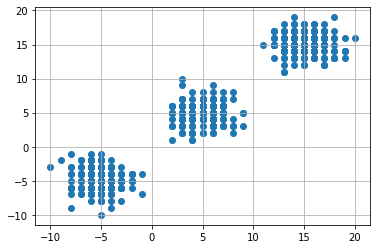

In [6]:
plt.scatter(b[:,0],b[:,1], marker ='o',linewidths =1) # 2 признака
plt.grid()

[[0.86666667 0.93103448]
 [0.86666667 0.86206897]
 [0.83333333 0.96551724]
 ...
 [0.1        0.13793103]
 [0.16666667 0.20689655]
 [0.1        0.27586207]]


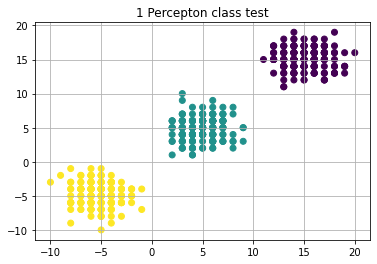

In [7]:
Y =[ [] for i in range (600)] # Классификационный признак
for i in range (0,200):
    Y[i] = 1
for i in range(200,400):
    Y[i]  =2
for i in range (400,600):
    Y[i] = 3
Y = np.array(Y)
Y = Y.reshape((600,1))

#нормализация признаков 
scaler = MinMaxScaler((0,1))
scaler.fit(b)
bn  =scaler.transform(b)
print(bn)

plt.scatter(b[:,0], b[:,1], marker='o', linewidths=1, c= Y)
plt.title("1 Percepton class test")
plt.grid()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(bn,Y,test_size = 0.4, random_state = 123)

Персептрон для 1 класса

In [9]:
y_train1 = [[] for _ in range (len(y_train))] # создаём массив для определения из y_train 1 класса
for _ in range(len(y_train)):
    if y_train[_] ==1:
        y_train1[_] = 1
    else:
        y_train1[_] = 0
y_train1 = np.array(y_train1)
y_train1 = y_train1.reshape((len(y_train),1))


# отдельный первый класс от двух других в тестирующей выборке
y_test1 = [[] for _ in range(len(y_test))] # массив для отделения из y_train 1 класса
for _ in range (len(y_test)):
    if y_test[_] ==  1:
        y_test1[_] =1
    else:
        y_test1[_] = 0
y_test1 =np.array(y_test1)
y_test1 = y_test1.reshape((len(y_test),1))

In [10]:
#создание персептрона для 1 класса
pr1 = Perceptron(n_iters = 1000)
#обучение персептрона на нахождение 1 класса
pr1.fit(X_train,y_train1)
#протон тестовой выборки черерз обученный перспетрон
pr1train = pr1.predict(X_train)

[[239   0]
 [  0 121]]


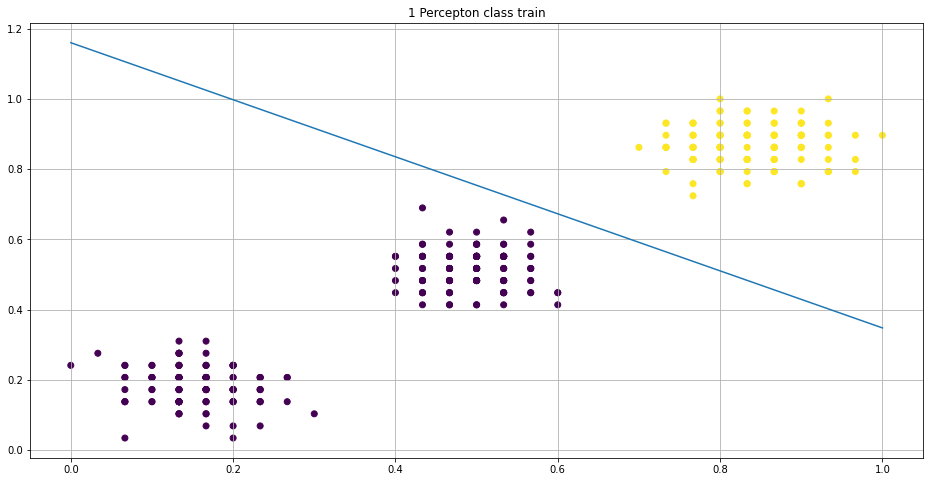

In [11]:

plt.figure(figsize=(16,8))
plt.scatter(X_train[:,0], X_train[:,1], marker='o', linewidths=1, c= pr1train)
plt.title("1 Percepton class train")
plt.grid()

#построение разделяющей прямой по весам и смещениям
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-pr1.weights[0] * x0_1 - pr1.bias) / pr1.weights[1]
x1_2 = (-pr1.weights[0] * x0_2 - pr1.bias) /pr1.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])


r = confusion_matrix(y_train1,pr1train)
print(r)


[[161   0]
 [  0  79]]


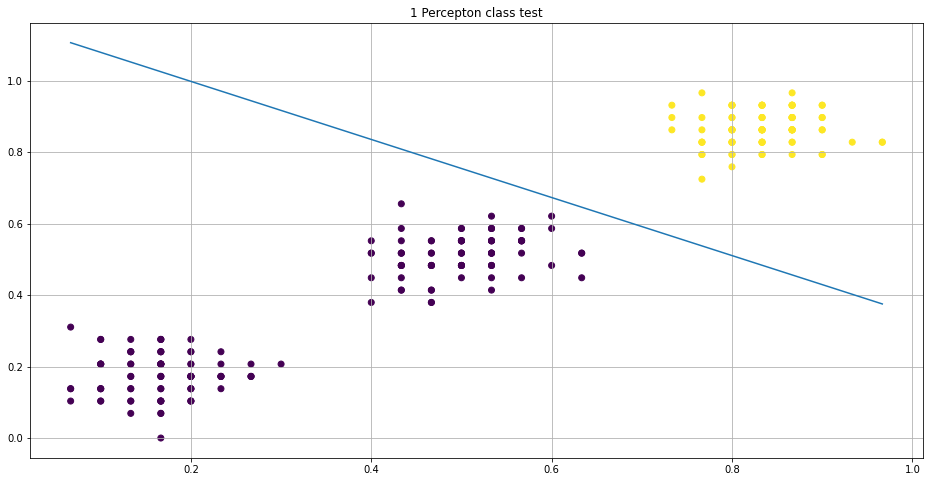

In [12]:
pr1train = pr1.predict(X_test)
plt.figure(figsize=(16,8))
plt.scatter(X_test[:,0], X_test[:,1], marker='o', linewidths=1, c= pr1train)
plt.title("1 Percepton class test")
plt.grid()

#построение разделяющей прямой по весам и смещениям
x0_1 = np.amin(X_test[:,0])
x0_2 = np.amax(X_test[:,0])

x1_1 = (-pr1.weights[0] * x0_1 - pr1.bias) / pr1.weights[1]
x1_2 = (-pr1.weights[0] * x0_2 - pr1.bias) /pr1.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])


r = confusion_matrix(y_test1,pr1train)
print(r)


Персептрон для 2 класса

In [13]:
# убираем 1 класс из обучающей выборки
y_train2 = np.delete(y_train,np.where(y_train ==[1]),axis=0)
X_train2 = np.delete(X_train,np.where(y_train ==[1]),axis=0)

 
    

#print(y_train2)
#print(X_train2)

for _ in range(len(y_train2)):
    if y_train2[_] == 2:
        y_train2[_] =1
    else:
        y_train2[_] = 0
# убираем 1 класс из тестовой выборки
y_test2 = np.delete(y_test, np.where(y_test==[1]),axis = 0)
x_test2 = np.delete(X_test, np.where(y_test==[1]),axis = 0)

for _ in range(len(y_test2)):
    if y_test2[_] == 2:
        y_test2[_] =1
    else:
        y_test2[_] = 0

[[117   0]
 [  0 121]]


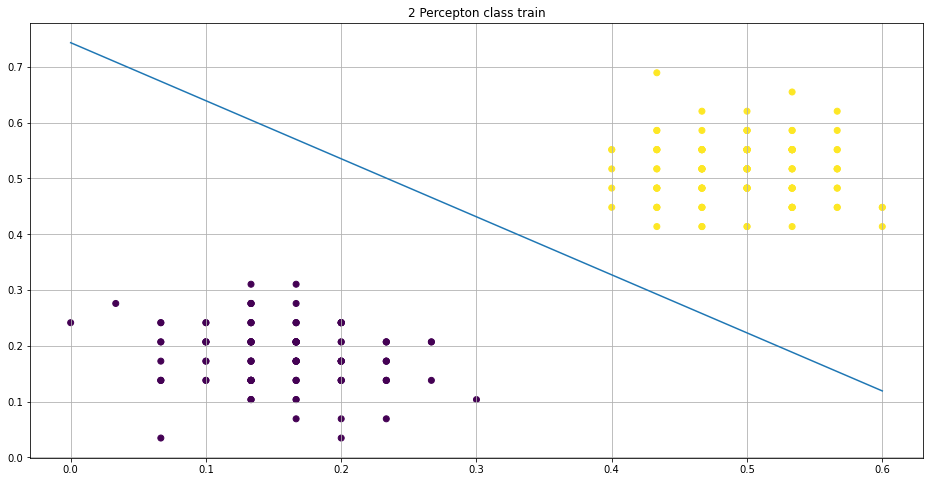

In [14]:
#создание персептрона для 2 класса
pr2 =Perceptron (n_iters = 1000)
#обчуение персептрона на нахождение 2 класса
pr2.fit(X_train2,y_train2)
#прогон тестовой выборки через обученный персептрон
pr2train = pr2.predict(X_train2)

#вывод обучающей выборки с окраской отдельного персептроном второго класса
plt.figure(figsize=(16,8))
plt.scatter(X_train2[:,0],X_train2[:,1],marker='o',linewidth=1,c=pr2train)
plt.title("2 Percepton class train")
plt.grid()

#построенеие разделяющей прямой
x0_1 = np.amin(X_train2[:,0])
x0_2 = np.amax(X_train2[:,0])

x1_1 = (-pr2.weights[0] * x0_1 - pr2.bias) / pr2.weights[1]
x1_2 = (-pr2.weights[0] * x0_2 - pr2.bias) /pr2.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])

r = confusion_matrix(y_train2,pr2train)
print(r)


[[82  0]
 [ 0 78]]


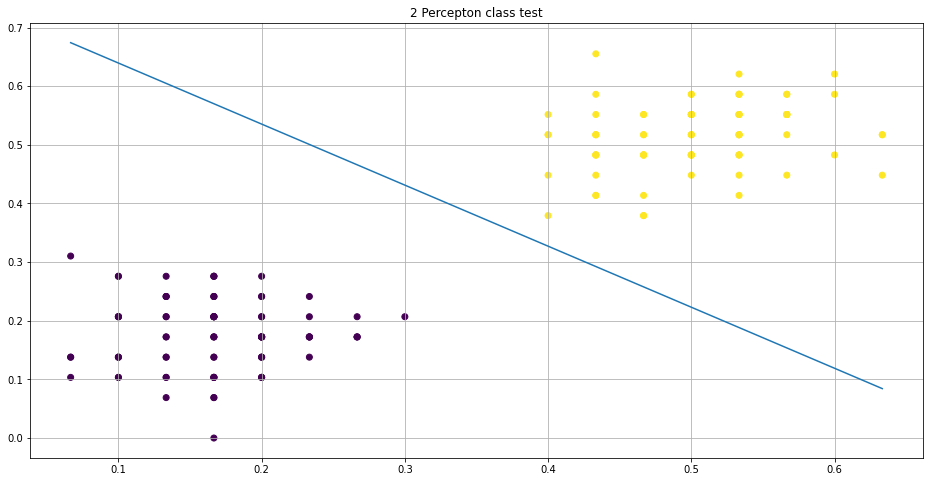

In [15]:
pr2test = pr2.predict(x_test2)

# вывод обучающей выборки с окраской отделенного персептрона второго класса
plt.figure(figsize=(16,8))
plt.scatter(x_test2[:,0], x_test2[:,1], marker ='o',lineWidth = 1, c = pr2test)
plt.title("2 Percepton class test")
plt.grid()




#построение разделяющей прямой по весам и смещениям
x0_1 = np.amin(x_test2[:,0])
x0_2 = np.amax(x_test2[:,0])

x1_1 = (-pr2.weights[0] * x0_1 - pr2.bias) / pr2.weights[1]
x1_2 = (-pr2.weights[0] * x0_2 - pr2.bias) /pr2.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])


r = confusion_matrix(y_test2,pr2test)
print(r)

Персептрон для 3 класса

In [16]:
# убираем 2 класс из обучающей выборки
y_train3 = np.delete(y_train2,np.where(y_train2 ==[1]),axis=0)
X_train3 = np.delete(X_train2,np.where(y_train2 ==[1]),axis=0)

 
for _ in range(len(y_train3)):
    if y_train3[_] == 2:
        y_train3[_] =1
    else:
        y_train3[_] = 0
# убираем 1 класс из тестовой выборки
y_test3 = np.delete(y_test2, np.where(y_test2==[1]),axis = 0)
x_test3 = np.delete(x_test2, np.where(y_test2==[1]),axis = 0)

for _ in range(len(y_test3)):
    if y_test3[_] == 2:
        y_test3[_] =1
    else:
        y_test3[_] = 0

[[117]]


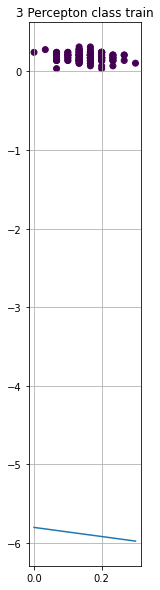

In [17]:
#создание персептрона для 2 класса
pr3 =Perceptron (n_iters = 1000)
#обчуение персептрона на нахождение 2 класса
pr3.fit(X_train3,y_train3)
#прогон тестовой выборки через обученный персептрон
pr3train = pr3.predict(X_train3)

#вывод обучающей выборки с окраской отдельного персептроном третьего класса
plt.figure(figsize=(2,10))
plt.scatter(X_train3[:,0],X_train3[:,1],marker='o',linewidth=1,c=pr3train)
plt.title("3 Percepton class train")
plt.grid()

#построенеие разделяющей прямой
x0_1 = np.amin(X_train3[:,0])
x0_2 = np.amax(X_train3[:,0])

x1_1 = (-pr3.weights[0] * x0_1 - pr2.bias) / pr3.weights[1]
x1_2 = (-pr3.weights[0] * x0_2 - pr2.bias) /pr3.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])

r = confusion_matrix(y_train3,pr3train)
print(r)

[[81]]


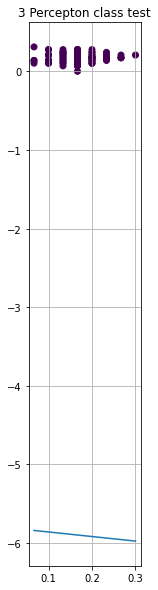

In [18]:
pr3test = pr3.predict(x_test3)

# вывод обучающей выборки с окраской отделенного персептрона второго класса
plt.figure(figsize=(2,10))
plt.scatter(x_test3[:,0], x_test3[:,1], marker ='o',lineWidth = 1, c = pr3test)
plt.title("3 Percepton class test")
plt.grid()




#построение разделяющей прямой по весам и смещениям
x0_1 = np.amin(x_test3[:,0])
x0_2 = np.amax(x_test3[:,0])

x1_1 = (-pr3.weights[0] * x0_1 - pr3.bias) / pr3.weights[1]
x1_2 = (-pr3.weights[0] * x0_2 - pr3.bias) /pr3.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])


r = confusion_matrix(y_test3,pr3test)
print(r)

Сеть Кохонена

Класс Сети Кохонена

In [19]:
class KohonenNet():
    def __init__(self, m=3, n=3, lr=1, sigma=1, max_iter=3000, weights = []):
        self.m = m #количество классов
        self.n = n #количество уровней сети
        self.shape = (m, n)
        self.initial_lr = lr
        self.lr = lr #скорость обучения
        self.sigma = sigma #параметр изменения скорости обучения (она будет снижаться с каждой итерацией)
        self.max_iter = max_iter

        self.weights = weights

#функция нахождения выйгравшего нейрона (нейрона с минимальным расстоянием до точки)
    def _find_bmu(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество центров кластеров(нейронов), количество признаков] (для каждого веса своя строка признаков(точка))
        distance = np.linalg.norm(x_stack - self.weights, axis=1)#эвклидовы расстояния между точкой выборки и нейронами
        return np.argmin(distance)#возвращаем индекс минимального расстояния (индекс подходящего нейрона)

    def step(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество весов, количество признаков] (для каждого веса своя строка признаков(точка))
        
        bmu_index = self._find_bmu(x)#передаем в функцию строку признаков (точку) и получаем индекс выйгравшего нейрона (центра кластера)
        self.weights[bmu_index] += self.lr * (x - self.weights[bmu_index])

    #обучение весов
    def fit(self, X, epochs=1, shuffle=True):
        global_iter_counter = 0
        n_samples = X.shape[0]#количество элементов выборки
        total_iterations = np.minimum(epochs * n_samples, self.max_iter)#количество обучения весов в эпохе

        for epoch in range(epochs):#изначально у нас 1 эпоха
            if global_iter_counter > self.max_iter:#не даем проводить больше 3000 эпох
                break

            if shuffle:
                indices = np.random.permutation(n_samples)#создание массива с индексами в разброс
            else:
                indices = np.arange(n_samples)#создание массива с индексами по порядку

            #обучение
            for idx in indices:#проход по выборке с индексами idx
                if global_iter_counter > self.max_iter:
                    break
                input = X[idx]
                #перемещение нейрона(изменение весов победившего нейрона)
                self.step(input)

                global_iter_counter += 1
                self.lr = (1 - (global_iter_counter / total_iterations)) * self.initial_lr#изменение параметра обучения

        self._n_iter_ = global_iter_counter

        return

    def returnChangedWeights(self):
      return self.weights

    def predict(self, X):
        labels = np.array([self._find_bmu(x) for x in X])
        return labels


In [20]:
# центры кластеров тренировочные данные
trainMax = np.amax(X_train)
trainMin = np.amin(X_train)
weights = np.random.uniform(trainMin, trainMax,(3,2))

[1 2 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 2 1
 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 2 1 2 1
 2 2 1 2 2 1 2 1 2 1 1 2 1 2 2 2 1 1 1 2 2 2 2 2 1 1 2 2 1 2 1 1 1 2 2 1 1
 1 2 1 2 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 2 2
 1 2 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1
 2 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2
 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1
 2 1 2 1 2 1 1 1 1 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 1 1]
360


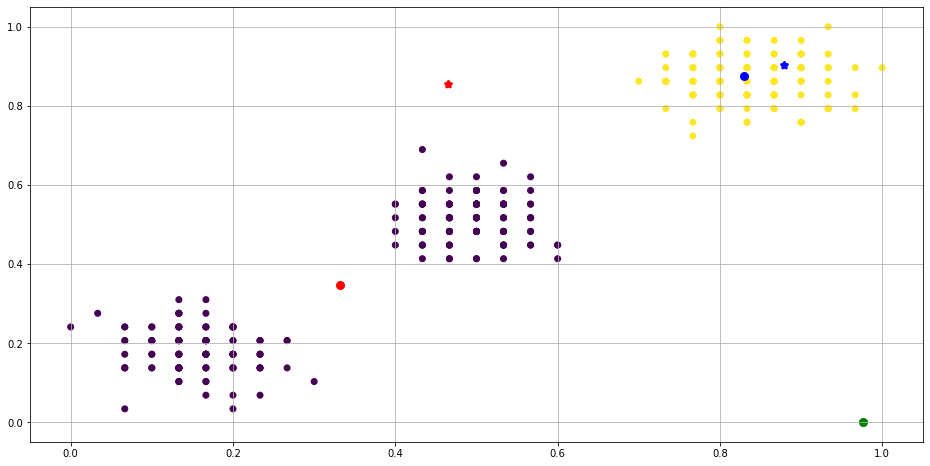

In [21]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
ax.scatter(weights[0,0], weights[0,1], marker='*', linewidths = 3, c="GREEN")
ax.scatter(weights[1,0], weights[1,1], marker='*', linewidths = 3, c="RED")
ax.scatter(weights[2,0], weights[2,1], marker='*', linewidths = 3, c="BLUE")

kohonen  = KohonenNet(m = 3,n = 1,weights=weights)

kohonen.fit(X_train, shuffle=True)
predTrain = kohonen.predict(X_train)
ax.scatter(X_train[:,0], X_train[:,1], marker='o', linewidths=1, c=predTrain)
ax.grid()
ax.scatter(kohonen.returnChangedWeights()[0,0], kohonen.returnChangedWeights()[0,1],  marker='o', linewidths=3, c = "GREEN")
ax.scatter(kohonen.returnChangedWeights()[1,0], kohonen.returnChangedWeights()[1,1],  marker='o', linewidths=3, c = "RED")
ax.scatter(kohonen.returnChangedWeights()[2,0], kohonen.returnChangedWeights()[2,1],  marker='o', linewidths=3, c = "BLUE")
print(predTrain)
print(predTrain.size)

In [22]:
predTrain = predTrain.reshape((len(predTrain),1))
print(confusion_matrix(y_train, predTrain+1))

[[  0   0 121]
 [  0 121   0]
 [  0 118   0]]


[1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 1 2
 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 1 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 1 2 2
 1 2 2 1 2 2 1 1 2 1 2 1 2 2 1 2 1 1 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2
 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 1 2 1 1 1 2
 2 2 1 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 2 2 2 2 1 2 1 2 2 2 1 1 1 2 1 2 1 2 2
 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1]
240


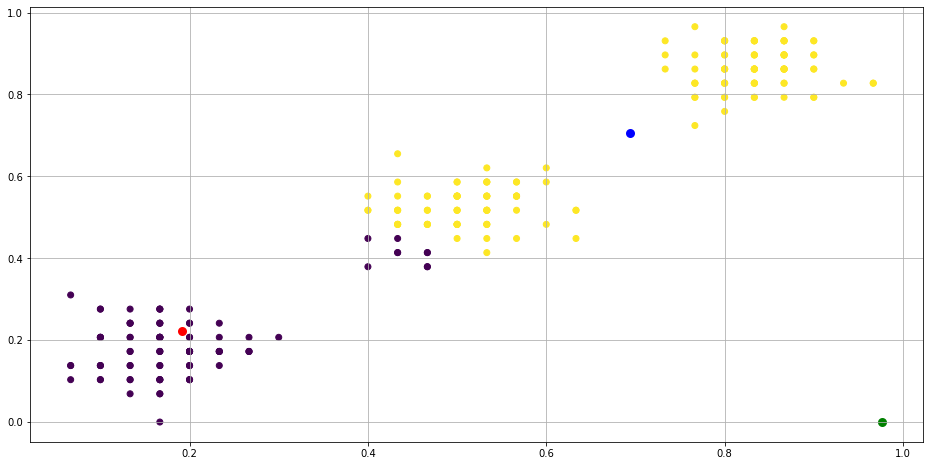

In [23]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()



kohonen.fit(X_test, shuffle=True)
predTest = kohonen.predict(X_test)
ax.scatter(X_test[:,0], X_test[:,1], marker='o', linewidths=1, c=predTest)
ax.grid()
ax.scatter(kohonen.returnChangedWeights()[0,0], kohonen.returnChangedWeights()[0,1],  marker='o', linewidths=3, c = "GREEN")
ax.scatter(kohonen.returnChangedWeights()[1,0], kohonen.returnChangedWeights()[1,1],  marker='o', linewidths=3, c = "RED")
ax.scatter(kohonen.returnChangedWeights()[2,0], kohonen.returnChangedWeights()[2,1],  marker='o', linewidths=3, c = "BLUE")
print(predTest)
print(predTest.size)

In [24]:
predTrain = predTrain.reshape((len(predTrain),1))
print(confusion_matrix(y_test, predTest+1))

[[ 0  0 79]
 [ 0  9 70]
 [ 0 82  0]]


In [25]:
!pip install neupy
from neupy import algorithms

     |████████████████████████████████| 226 kB 15.4 MB/s 
     |████████████████████████████████| 92.7 MB 9.8 kB/s 
     |████████████████████████████████| 3.2 MB 41.1 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
     |████████████████████████████████| 367 kB 58.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progr

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Нейронная сеть для распознавания

[3 1 2 2 1 2 3 2 1 1 2 3 2 1 3 1 3 2 2 2 2 2 2 1 2 3 2 2 2 1 2 2 1 2 2 1 3
 3 3 3 2 2 1 3 2 3 2 2 3 1 3 1 3 2 1 2 3 1 2 1 1 3 2 1 2 3 3 1 3 1 1 3 1 3
 1 1 3 1 1 2 1 2 1 3 3 1 3 1 1 1 2 2 2 1 1 1 1 1 3 2 1 1 2 1 3 2 3 1 1 2 3
 3 1 2 1 2 3 3 1 2 2 1 2 2 1 3 1 3 2 3 2 1 3 3 2 3 3 3 3 3 2 3 1 2 2 2 3 2
 1 3 1 3 2 2 1 1 1 1 1 3 3 1 2 2 1 2 2 2 3 3 3 1 2 2 3 1 1 3 2 3 1 3 3 1 1
 3 1 1 3 1 2 3 1 3 1 1 1 2 2 3 3 3 1 3 3 1 2 2 2 3 2 3 3 1 1 2 1 3 3 1 3 2
 1 1 1 3 2 3 3 2 1 3 3 2 2 3 1 3 1 3 2 2 2 3 2 2 2 1 3 2 2 3 2 3 2 3 3 2 3
 2 3 2 2 3 1 1 1 2 1 1 3 2 1 3 3 3 1 1 3 1 1 2 2 2 2 1 2 3 3 1 1 3 2 1 2 1
 3 3 3 2 3 3 2 1 1 2 2 2 2 1 2 3 3 1 3 2 3 1 2 3 3 2 3 2 2 1 2 1 1 1 3 3 3
 1 2 1 3 1 2 3 2 2 3 1 2 3 1 1 1 1 2 3 1 1 1 1 2 2 2 3]
[[121   0   0]
 [  0 121   0]
 [  0   0 118]]


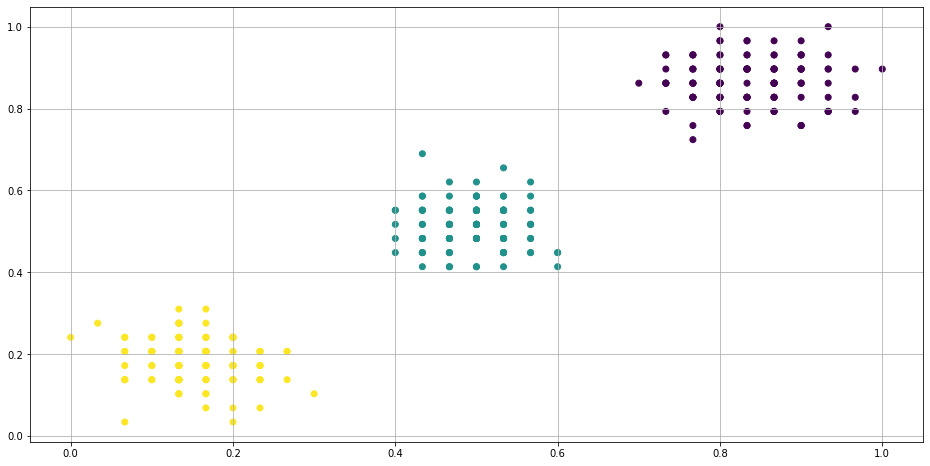

In [59]:


pnn = algorithms.PNN(std=10, verbose=False)
pnn.train(X_train, y_train)

prY_Train = pnn.predict(X_train)
print(prY_Train)
r = confusion_matrix(y_train, prY_Train)
print(r)
plt.figure(figsize=(16,8))
plt.scatter(X_train[:,0], X_train[:,1], marker='o', linewidths=1, c= prY_Train)
plt.grid()


[2 1 3 2 3 1 3 3 2 3 3 1 2 1 1 3 2 3 3 2 3 3 3 3 1 1 1 1 2 1 1 2 2 2 2 3 2
 3 2 1 1 2 2 3 3 3 1 3 3 2 3 2 2 2 2 1 1 1 2 1 3 3 2 1 3 3 2 1 2 2 2 2 1 1
 1 3 3 2 1 1 1 2 1 2 2 2 3 1 2 1 3 1 2 3 2 3 1 1 3 3 3 1 2 2 3 3 3 2 3 2 1
 3 1 1 3 2 1 3 3 2 3 1 3 2 2 3 2 3 3 1 3 1 2 1 1 2 3 2 2 3 2 2 2 2 1 2 3 2
 2 2 1 2 1 3 2 1 1 1 1 1 3 3 3 2 1 3 3 3 3 1 3 2 3 2 3 1 2 1 1 3 2 2 3 3 1
 1 2 3 1 1 1 2 1 1 2 1 3 3 1 3 1 3 2 2 2 1 1 3 2 3 1 1 1 3 3 3 1 3 2 3 2 1
 1 1 2 2 2 1 3 1 1 3 1 3 1 2 2 3 2 3]
[[79  0  0]
 [ 0 79  0]
 [ 0  0 82]]


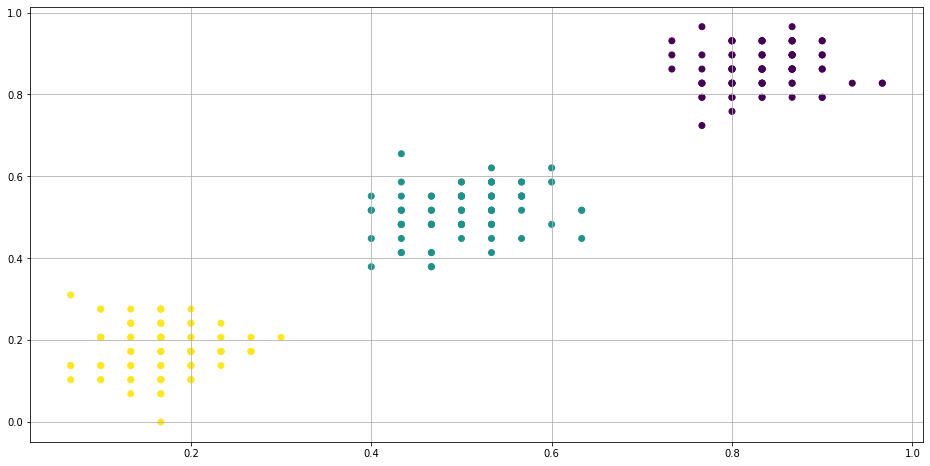

In [60]:

prY_Train = pnn.predict(X_test)
print(prY_Train)
r = confusion_matrix(y_test, prY_Train)
print(r)
plt.figure(figsize=(16,8))
plt.scatter(X_test[:,0], X_test[:,1], marker='o', linewidths=1, c= prY_Train)
plt.grid()

Сеть прямого распространения


In [61]:

from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
seed(1)
network = initialize_network(2, 4, 3)
#for neuron in network:
#	print(neuron)

In [255]:
from math import exp
 
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs # выходы
	return inputs
 
# test forward propagation
#network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
#		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, 2]
output = forward_propagate(network, row)
print(output)

[0.125269449825114, 0.13060227955538792, 0.12179897475584586]


In [256]:
for neuron in network:
	print(neuron)

[{'weights': [0.11986664730358725], 'output': 0.5299308331877548, 'delta': 0.0046210695102793286}, {'weights': [1.1134352203131979], 'output': 0.7527689878542108, 'delta': 0.007078546339420363}]
[{'weights': [-0.09393171109785305, -0.9342841940848494, -1.19037140326809], 'output': 0.125269449825114, 'delta': -0.014033305077392817}, {'weights': [-0.512908882264345, -0.6865037124200809, -1.1070590893077146], 'output': 0.13060227955538792, 'delta': -0.015184991118802544}, {'weights': [-0.7210090707170347, -1.1007473632992624, -0.7648101716293878], 'output': 0.12179897475584586, 'delta': -0.013316913386759308}]


In [257]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# test backpropagation of error
#network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
#		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1, 2]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'weights': [0.11986664730358725], 'output': 0.5299308331877548, 'delta': -0.04837442926272879}, {'weights': [1.1134352203131979], 'output': 0.7527689878542108, 'delta': -0.051381458867094984}]
[{'weights': [-0.09393171109785305, -0.9342841940848494, -1.19037140326809], 'output': 0.125269449825114, 'delta': -0.013726652353168521}, {'weights': [-0.512908882264345, -0.6865037124200809, -1.1070590893077146], 'output': 0.13060227955538792, 'delta': 0.09871604596604848}, {'weights': [-0.7210090707170347, -1.1007473632992624, -0.7648101716293878], 'output': 0.12179897475584586, 'delta': 0.200899865360121}]


In [311]:
import math
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	
blist = X_train.tolist()
Y_train=y_train-1
Y_train= Y_train.tolist()

for i in range(0, len(y_train)):
    blist[i]=blist[i]+Y_train[i]

#print(blist)
dataset=blist
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))

network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 200, n_outputs)

>epoch=0, lrate=0.500, error=240.586
>epoch=1, lrate=0.500, error=163.817
>epoch=2, lrate=0.500, error=117.946
>epoch=3, lrate=0.500, error=102.463
>epoch=4, lrate=0.500, error=93.460
>epoch=5, lrate=0.500, error=81.334
>epoch=6, lrate=0.500, error=62.143
>epoch=7, lrate=0.500, error=41.955
>epoch=8, lrate=0.500, error=27.403
>epoch=9, lrate=0.500, error=18.682
>epoch=10, lrate=0.500, error=13.552
>epoch=11, lrate=0.500, error=10.382
>epoch=12, lrate=0.500, error=8.300
>epoch=13, lrate=0.500, error=6.855
>epoch=14, lrate=0.500, error=5.806
>epoch=15, lrate=0.500, error=5.016
>epoch=16, lrate=0.500, error=4.403
>epoch=17, lrate=0.500, error=3.915
>epoch=18, lrate=0.500, error=3.519
>epoch=19, lrate=0.500, error=3.191
>epoch=20, lrate=0.500, error=2.916
>epoch=21, lrate=0.500, error=2.682
>epoch=22, lrate=0.500, error=2.481
>epoch=23, lrate=0.500, error=2.307
>epoch=24, lrate=0.500, error=2.154
>epoch=25, lrate=0.500, error=2.019
>epoch=26, lrate=0.500, error=1.900
>epoch=27, lrate=0.500

In [312]:

# # Make a prediction with a network
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs.index(max(outputs))

s1=0
s2=0

i=-1
for row in dataset:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTrain = np.array([[prediction]])
    else:
      predictTrain =np.append(predTrain,[[prediction]],axis=0)

    if(row[-1] == prediction):
      out_green('Expected=%d, Got=%d' % (row[-1], prediction))
      s1+=1
    else:
      out_red('Expected=%d, Got=%d' % (row[-1], prediction))
      s2+=1

print()
print(confusion_matrix(Y_train, predTrain))

i=-1
for row in X_test:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTest = np.array([[prediction]])
    else:
      predictTest =np.append(predictTest,[[prediction]],axis=0)

print()
print(confusion_matrix(y_test-1, predictTest))
print()
print('True=%d, False=%d' % (s1, s2)) 





Expected=2, Got=2
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=2, Got=2
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=2, Got=2
Expected=1, Got=1
Expected=0, Got=0
Expected=2, Got=2
Expected=0, Got=0
Expected=2, Got=2
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=2, Got=2
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=2, Got=2
Expected=2, Got=2
Expected=2, Got=2
Expected=2, Got=2
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=2, Got=2
Expected=1, Got=1
Expected=2, Got=2
Expected=1, Got=1
Expected=1, Got=1
Expected=2, Got=2
Expected=0, Got=0
Expected=2, Got=2
Expected=0, Got=0
Expected=2, Got=2
Expected=1, Got=1
Expected=0, Got=0
Expected=1

In [310]:
def out_red(text):
    print("\033[31m{}".format(text))


def out_green(text):
    print("\033[32m{}".format(text))
